<a href="https://colab.research.google.com/github/Herodegon/ECGR4105-Intro-to-Machine-Learning/blob/main/Assignment4_SVMClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment  4 (100 Points)

In this assignment, we will use the cancer dataset. (Note: You can use the built-in function from ML libraries for gradient descent, training, and validation.) Also, sample code for accessing and cleaning up the dataset provided in Canvas. For the evaluation of this assignment across all problems, use 80%, 20% split. We will also use US Housing dataset with  80% and 20% split between training and evaluation (test) sets.

Problem 1 (50pts):

Use the cancer dataset to build an SVM classifier to classify the type of cancer (Malignant vs. benign). Use the PCA feature extraction for your training. Perform N number of independent training (N=1, …, K).
1. Identify the optimum number of K, principal components that achieve the highest classification accuracy.
2. Plot your classification accuracy, precision, and recall over a different number of Ks.
3. Explore different kernel tricks to capture non-linearities within your data. Plot the results and compare the accuracies for different kernels.
4. Compare your results against the logistic regression that you have done in homework 3.


In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
file_path = '/content/drive/MyDrive/ECGR4105/HW3_cancer.csv'
dataset2 = pd.DataFrame(pd.read_csv(file_path))
M=len(dataset2)
M

569

In [40]:
dataset2.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [41]:
accepted_values = [True if i not in [0,1,len(dataset2.columns)-1] else False for i in range(len(dataset2.columns))]
X2 = dataset2.iloc[:, accepted_values].values   # Using all classes as inputs
print("X2 Fit = ", X2.shape[1])
print("X2 = ", X2[:5])
Y2 = dataset2.iloc[:, 1].values
for i in range(len(Y2)):
  if Y2[i] == 'M':
    Y2[i] = 1
  else:
    Y2[i] = 0
Y2 = Y2.astype(int)
print("Y2 = ", Y2)

X2 Fit =  30
X2 =  [[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.20, random_state = 0)
sc_X2 = StandardScaler()
X2_train = sc_X2.fit_transform(X2_train)
X2_test = sc_X2.transform(X2_test)
print("X2 Test = ", X2_test[:5])

X2 Test =  [[-2.01756035e-01  3.29078595e-01 -1.30867543e-01 -2.71455060e-01
   1.02919769e+00  8.64118359e-01  7.33638979e-01  8.56696884e-01
   1.12032775e+00  1.55358480e+00 -4.19756553e-02 -5.15882060e-01
   1.31540867e-01 -1.38756360e-01 -5.59539726e-01 -1.37973541e-01
   9.80707980e-02  2.87511965e-01 -4.24461408e-01  1.13051490e-01
   3.15041438e-02  6.76288863e-01  1.85286211e-01 -6.28080803e-02
   1.10353068e+00  8.74442671e-01  1.21909090e+00  1.38932910e+00
   1.08203284e+00  1.54029664e+00]
 [-2.55557728e-01  1.46763319e+00 -3.17804369e-01 -3.24002437e-01
  -6.16890723e-01 -1.01654032e+00 -7.69012291e-01 -7.26494747e-01
  -6.95676578e-01 -1.00245069e+00 -6.83394184e-01  2.58825850e-01
  -7.42440151e-01 -4.76228985e-01 -4.34915412e-01 -9.70882022e-01
  -5.26937769e-01 -8.81955920e-01 -8.61714253e-01 -7.22065770e-01
  -3.90179717e-01  1.42621620e+00 -4.65282304e-01 -4.23883064e-01
  -1.57481925e-01 -9.51751507e-01 -6.44331682e-01 -8.33693643e-01
  -7.31315768e-01 -8.77325222e

In [43]:
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def PlotLoss(training_cost_history,validation_cost_history,iterations,x_label,y_label,title):
  plt.plot(range(iterations),training_cost_history, color='b', label= 'Training Loss')
  plt.plot(range(iterations),validation_cost_history, color='r', label= 'Validation Loss')
  plt.rcParams["figure.figsize"] = (6,4)
  plt.legend()

  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(title)

  # Print final graph
  plt.show()
  return

def PrintData(Y_test,Y_valid_pred):
  print("Accuracy Score = ", accuracy_score(Y_test, Y_valid_pred))
  print("Precision Score = ", precision_score(Y_test, Y_valid_pred))
  print("Recall Score = ", recall_score(Y_test, Y_valid_pred))
  print("F1 Score = ", f1_score(Y_test, Y_valid_pred))

In [44]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

prev_accuracy = 0
curr_accuracy = 0
new_accuracy = 0
k_value = 0
for i in range(1,31):
  print("Iteration = ",i)
  pca = PCA(n_components=i)
  pca_columns = []
  for j in range(0,i):
    pca_columns.append('PC' + str(i+1))
  X2_train_pca = pca.fit_transform(X2_train)
  X2_test_pca = pca.fit_transform(X2_test)
  principalDf_train = pd.DataFrame(data = X2_train_pca, columns = pca_columns)
  principalDf_test = pd.DataFrame(data = X2_test_pca, columns = pca_columns)

  Y2_train_pred = np.empty(0)
  Y2_valid_pred = np.empty(0)
  training_loss = []
  validation_loss = []
  accuracy_training = []
  accuracy_validation = []
  precision_training = []
  precision_validation = []
  recall_training = []
  recall_validation = []
  f1_training = []
  f1_validation = []

  # Model
  model2 = SVC()

  model2.fit(principalDf_train,Y2_train)
  Y2_train_pred = model2.predict(principalDf_train)
  Y2_valid_pred = model2.predict(principalDf_test)

  new_accuracy = accuracy_score(Y2_test,Y2_valid_pred)

  print(classification_report(Y2_test, Y2_valid_pred))
  print("Accuracy Score = ",new_accuracy)
  if curr_accuracy == 0:
    curr_accuracy = new_accuracy
  elif prev_accuracy == 0:
    prev_accuracy = curr_accuracy
    curr_accuracy = new_accuracy
  elif curr_accuracy > new_accuracy and curr_accuracy > prev_accuracy:
    k_value = i-1
    break
  else:
    prev_accuracy = curr_accuracy
    curr_accuracy = new_accuracy

print("Best Accuracy Score = ",curr_accuracy," for k-value ",k_value)

Iteration =  1
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        67
           1       0.86      0.89      0.88        47

    accuracy                           0.89       114
   macro avg       0.89      0.89      0.89       114
weighted avg       0.90      0.89      0.90       114

Accuracy Score =  0.8947368421052632
Iteration =  2
              precision    recall  f1-score   support

           0       0.93      0.94      0.93        67
           1       0.91      0.89      0.90        47

    accuracy                           0.92       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114

Accuracy Score =  0.9210526315789473
Iteration =  3
              precision    recall  f1-score   support

           0       0.91      0.94      0.93        67
           1       0.91      0.87      0.89        47

    accuracy                           0.91       114
   macro 

By looking at the accuracy, precision, and recall results over multiple K values, it can be observed that `k=2` results in the best scores across all categories.

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def PlotConfusionMatrix(cnf_matrix):
  class_names=[0,1] # name  of classes
  fig, ax = plt.subplots()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names)
  plt.yticks(tick_marks, class_names)
  # create heatmap
  sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="tab10" ,fmt='g')
  ax.xaxis.set_label_position("top")
  plt.tight_layout()
  plt.title('Confusion matrix', y=1.1)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.93      0.94      0.93        67
           1       0.91      0.89      0.90        47

    accuracy                           0.92       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



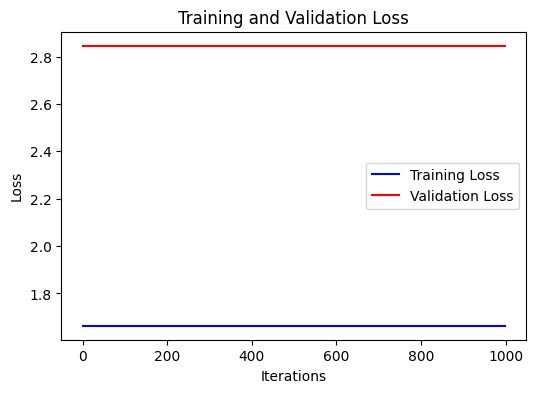

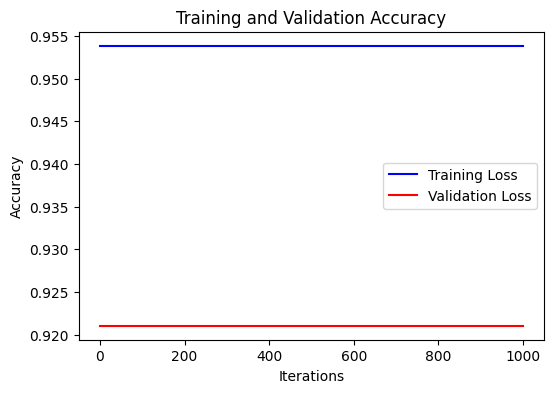

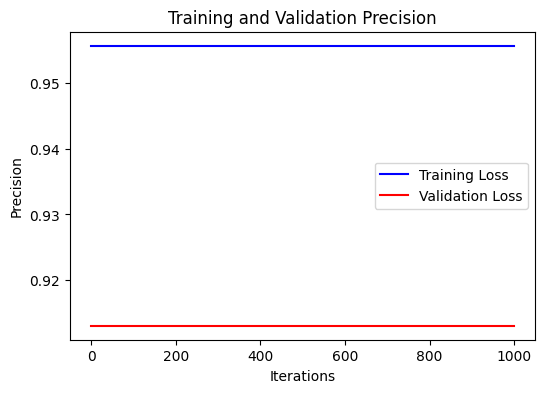

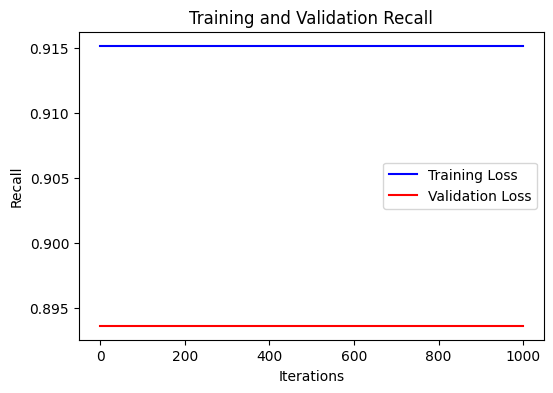

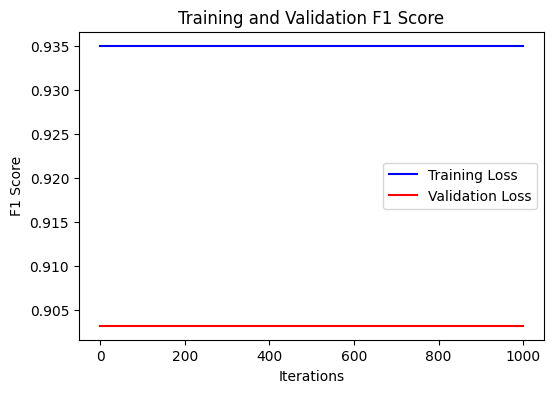

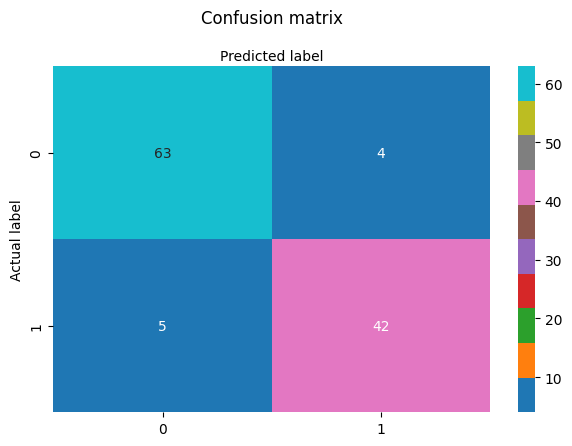

In [46]:
Y2_train_pred = np.empty(0)
Y2_valid_pred = np.empty(0)
training_loss = []
validation_loss = []
accuracy_training = []
accuracy_validation = []
precision_training = []
precision_validation = []
recall_training = []
recall_validation = []
f1_training = []
f1_validation = []

# Model
model2 = SVC()

# Decomposition
pca = PCA(n_components=k_value)

pca_columns = []
for j in range(0,k_value):
  pca_columns.append('PC' + str(i+1))

X2_train_pca = pca.fit_transform(X2_train)
X2_test_pca = pca.fit_transform(X2_test)
principalDf_train = pd.DataFrame(data = X2_train_pca, columns = pca_columns)
principalDf_test = pd.DataFrame(data = X2_test_pca, columns = pca_columns)

# Training
iterations = 1000
for i in range(0,iterations):
  model2.fit(principalDf_train,Y2_train)
  Y2_train_pred = model2.predict(principalDf_train)
  Y2_valid_pred = model2.predict(principalDf_test)

  # Append Loss History
  training_loss.append(log_loss(Y2_train, Y2_train_pred))
  validation_loss.append(log_loss(Y2_test, Y2_valid_pred))

  # Append Accuracy History
  accuracy_training.append(accuracy_score(Y2_train, Y2_train_pred))
  accuracy_validation.append(accuracy_score(Y2_test, Y2_valid_pred))

  # Append Precision History
  precision_training.append(precision_score(Y2_train, Y2_train_pred))
  precision_validation.append(precision_score(Y2_test, Y2_valid_pred))

  # Append Recall History
  recall_training.append(recall_score(Y2_train, Y2_train_pred))
  recall_validation.append(recall_score(Y2_test, Y2_valid_pred))

  # Append F1 Score History
  f1_training.append(f1_score(Y2_train, Y2_train_pred))
  f1_validation.append(f1_score(Y2_test, Y2_valid_pred))

print(classification_report(Y2_test, Y2_valid_pred))

# Print Histories Over Iterations
PlotLoss(training_loss,validation_loss,iterations,"Iterations","Loss","Training and Validation Loss")
PlotLoss(accuracy_training,accuracy_validation,iterations,"Iterations","Accuracy","Training and Validation Accuracy")
PlotLoss(precision_training,precision_validation,iterations,"Iterations","Precision","Training and Validation Precision")
PlotLoss(recall_training,recall_validation,iterations,"Iterations","Recall","Training and Validation Recall")
PlotLoss(f1_training,f1_validation,iterations,"Iterations","F1 Score","Training and Validation F1 Score")

model2_matrix = confusion_matrix(Y2_test, Y2_valid_pred)
PlotConfusionMatrix(model2_matrix)

SVM classification improves on the Logistical Regression model used during the last assignment, at least for the majority. The improved score likely has to do with the combination of SVM with PCA feature extraction, as having the major features selected and weighted at the start remove the oscillation and overfitting that it could run into if it was training without feature extraction.

Problem 2 (50pts):

Develop a SVR regression model that predicts housing price based on the following input variables:

Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea

1. Plot your regression model for SVR similar to the sample code provided on Canvas.
2. Compare your results against linear regression with regularization loss that you already did in assignment1.
3. Use the PCA feature extraction for your training. Perform N number of independent training (N=1, …, K). Identify the optimum number of K, principal components that achieve the highest regression accuracy.
4. Explore different kernel tricks to capture non-linearities within your data. Plot the results and compare the accuracies for different kernels.


In [47]:
file_path = '/content/drive/MyDrive/ECGR4105/HW2_Housing.csv'
dataset = pd.DataFrame(pd.read_csv(file_path))
M=len(dataset)
M

545

In [48]:
X_1 = dataset.iloc[:,[1,2,3,4,10]].values  # Get input values from each explanatory variable (Area, Bedrooms, Bathrooms, Stories, Parking)
Y_1 = dataset.iloc[:,0].values             # Get output values (Price of Housing)
m = int(np.floor(len(X_1)*0.8))            # Number of training examples
n = int(np.floor(len(X_1)*0.2))            # Number of validation examples

print("X_area = ", np.hstack(X_1[:5,0]))
print("X_bedrooms = ", np.hstack(X_1[:5,1]))
print("X_bathrooms = ", np.hstack(X_1[:5,2]))
print("X_stories = ", np.hstack(X_1[:5,3]))
print("X_parking = ", np.hstack(X_1[:5,4]))
print("Y = ", np.hstack(Y_1[:5]))
print("m = ", m)
print("n = ", n)

X_area =  [7420 8960 9960 7500 7420]
X_bedrooms =  [4 4 3 4 4]
X_bathrooms =  [2 4 2 2 1]
X_stories =  [3 4 2 2 2]
X_parking =  [2 3 2 3 2]
Y =  [13300000 12250000 12250000 12215000 11410000]
m =  436
n =  109


In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X_1, Y_1, test_size = 0.20, random_state = 0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
print("X Test = ", X_test[:5])

X Test =  [[-0.53893631  0.05251643 -0.57330726  0.21291401  0.32555914]
 [ 2.09116064  0.05251643 -0.57330726 -0.93314164  1.47026706]
 [-0.79165025  1.39940847 -0.57330726  0.21291401 -0.81914879]
 [ 3.76656047 -1.29437561 -0.57330726 -0.93314164  0.32555914]
 [-0.69805249  1.39940847 -0.57330726  0.21291401 -0.81914879]]


In [50]:
prev_accuracy = 0
curr_accuracy = 0
new_accuracy = 0
k_value = 0
for i in range(1,31):
  print("Iteration = ",i)
  pca = PCA(n_components=i)
  pca_columns = []
  for j in range(0,i):
    pca_columns.append('PC' + str(i+1))
  X_train_pca = pca.fit_transform(X_train)
  X_test_pca = pca.fit_transform(X_test)
  principalDf_train = pd.DataFrame(data = X_train_pca, columns = pca_columns)
  principalDf_test = pd.DataFrame(data = X_test_pca, columns = pca_columns)

  Y_train_pred = np.empty(0)
  Y_valid_pred = np.empty(0)
  training_loss = []
  validation_loss = []
  accuracy_training = []
  accuracy_validation = []
  precision_training = []
  precision_validation = []
  recall_training = []
  recall_validation = []
  f1_training = []
  f1_validation = []

  # Model
  model1 = SVC()

  model1.fit(principalDf_train,Y_train)
  Y_train_pred = model1.predict(principalDf_train)
  Y_valid_pred = model1.predict(principalDf_test)

  new_accuracy = accuracy_score(Y_test,Y_valid_pred)

  print(classification_report(Y_test, Y_valid_pred))
  print("Accuracy Score = ",new_accuracy)
  if curr_accuracy == 0:
    curr_accuracy = new_accuracy
  elif prev_accuracy == 0:
    prev_accuracy = curr_accuracy
    curr_accuracy = new_accuracy
  elif curr_accuracy > new_accuracy and curr_accuracy > prev_accuracy:
    k_value = i-1
    break
  else:
    prev_accuracy = curr_accuracy
    curr_accuracy = new_accuracy

print("Best Accuracy Score = ",curr_accuracy," for k-value ",k_value)

Iteration =  1


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

              precision    recall  f1-score   support

     1750000       0.00      0.00      0.00         1
     1890000       0.00      0.00      0.00         1
     1960000       0.00      0.00      0.00         1
     2380000       0.00      0.00      0.00         1
     2450000       0.00      0.00      0.00         0
     2660000       0.00      0.00      0.00         1
     2835000       0.00      0.00      0.00         1
     2940000       0.00      0.00      0.00         2
     3080000       0.00      0.00      0.00         2
     3129000       0.00      0.00      0.00         1
     3150000       0.00      0.00      0.00         3
     3290000       0.00      0.00      0.00         5
     3325000       0.00      0.00      0.00         1
     3332000       0.00      0.00      0.00         1
     3360000       0.00      0.00      0.00         1
     3395000       0.00      0.00      0.00         1
     3500000       0.05      0.40      0.09         5
     3535000       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

              precision    recall  f1-score   support

     1750000       0.00      0.00      0.00         1
     1890000       0.00      0.00      0.00         1
     1960000       0.00      0.00      0.00         1
     2380000       0.00      0.00      0.00         1
     2450000       0.00      0.00      0.00         0
     2660000       0.00      0.00      0.00         1
     2835000       0.00      0.00      0.00         1
     2940000       0.00      0.00      0.00         2
     3080000       0.00      0.00      0.00         2
     3129000       0.00      0.00      0.00         1
     3150000       0.00      0.00      0.00         3
     3290000       0.00      0.00      0.00         5
     3325000       0.00      0.00      0.00         1
     3332000       0.00      0.00      0.00         1
     3360000       0.00      0.00      0.00         1
     3395000       0.00      0.00      0.00         1
     3500000       0.06      0.40      0.11         5
     3535000       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

              precision    recall  f1-score   support

     1750000       0.00      0.00      0.00         1
     1890000       0.00      0.00      0.00         1
     1960000       0.00      0.00      0.00         1
     2380000       0.00      0.00      0.00         1
     2660000       0.50      1.00      0.67         1
     2835000       0.00      0.00      0.00         1
     2940000       0.00      0.00      0.00         2
     3080000       0.00      0.00      0.00         2
     3129000       0.00      0.00      0.00         1
     3150000       0.00      0.00      0.00         3
     3290000       0.00      0.00      0.00         5
     3325000       0.00      0.00      0.00         1
     3332000       0.00      0.00      0.00         1
     3360000       0.00      0.00      0.00         1
     3395000       0.00      0.00      0.00         1
     3500000       0.06      0.40      0.10         5
     3535000       0.00      0.00      0.00         1
     3570000       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [51]:
Y_train_pred = np.empty(0)
Y_valid_pred = np.empty(0)
training_loss = []
validation_loss = []
accuracy_training = []
accuracy_validation = []
precision_training = []
precision_validation = []
recall_training = []
recall_validation = []
f1_training = []
f1_validation = []

# Model
model1 = SVC()

# Decomposition
pca = PCA(n_components=k_value)

pca_columns = []
for j in range(0,k_value):
  pca_columns.append('PC' + str(i+1))

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)
principalDf_train = pd.DataFrame(data = X_train_pca, columns = pca_columns)
principalDf_test = pd.DataFrame(data = X_test_pca, columns = pca_columns)

# Training
iterations = 1000
for i in range(0,iterations):
  model1.fit(principalDf_train,Y_train)
  Y_train_pred = model1.predict(principalDf_train)
  Y_valid_pred = model1.predict(principalDf_test)

  # Append Loss History
  training_loss.append(log_loss(Y_train, Y_train_pred))
  validation_loss.append(log_loss(Y_test, Y_valid_pred))

  # Append Accuracy History
  accuracy_training.append(accuracy_score(Y_train, Y_train_pred))
  accuracy_validation.append(accuracy_score(Y_test, Y_valid_pred))

  # Append Precision History
  precision_training.append(precision_score(Y_train, Y_train_pred))
  precision_validation.append(precision_score(Y_test, Y_valid_pred))

  # Append Recall History
  recall_training.append(recall_score(Y_train, Y_train_pred))
  recall_validation.append(recall_score(Y_test, Y_valid_pred))

  # Append F1 Score History
  f1_training.append(f1_score(Y_train, Y_train_pred))
  f1_validation.append(f1_score(Y_test, Y_valid_pred))

print(classification_report(Y_test, Y_valid_pred))

# Print Histories Over Iterations
PlotLoss(training_loss,validation_loss,iterations,"Iterations","Loss","Training and Validation Loss")
PlotLoss(accuracy_training,accuracy_validation,iterations,"Iterations","Accuracy","Training and Validation Accuracy")
PlotLoss(precision_training,precision_validation,iterations,"Iterations","Precision","Training and Validation Precision")
PlotLoss(recall_training,recall_validation,iterations,"Iterations","Recall","Training and Validation Recall")
PlotLoss(f1_training,f1_validation,iterations,"Iterations","F1 Score","Training and Validation F1 Score")

model1_matrix = confusion_matrix(Y_test, Y_valid_pred)
PlotConfusionMatrix(model1_matrix)

ValueError: y_true and y_pred contain different number of classes 196, 2. Please provide the true labels explicitly through the labels argument. Classes found in y_true: [ 1750000  1767150  1820000  1855000  1890000  2100000  2135000  2233000
  2240000  2275000  2310000  2345000  2380000  2408000  2450000  2485000
  2520000  2590000  2604000  2653000  2660000  2695000  2730000  2800000
  2835000  2852500  2870000  2940000  2961000  2975000  3003000  3010000
  3045000  3080000  3087000  3115000  3118850  3143000  3150000  3220000
  3234000  3255000  3290000  3325000  3353000  3360000  3395000  3423000
  3430000  3465000  3493000  3500000  3570000  3605000  3640000  3675000
  3703000  3710000  3745000  3773000  3780000  3836000  3850000  3885000
  3920000  3990000  4007500  4025000  4060000  4095000  4130000  4165000
  4193000  4200000  4235000  4270000  4277000  4305000  4319000  4340000
  4375000  4382000  4403000  4410000  4445000  4473000  4480000  4515000
  4543000  4550000  4585000  4620000  4655000  4690000  4760000  4767000
  4795000  4830000  4865000  4893000  4900000  4907000  4935000  4956000
  4970000  5033000  5040000  5110000  5145000  5215000  5229000  5243000
  5250000  5285000  5320000  5390000  5425000  5460000  5495000  5523000
  5530000  5565000  5600000  5652500  5740000  5775000  5810000  5866000
  5873000  5880000  5943000  5950000  6020000  6083000  6090000  6160000
  6195000  6230000  6265000  6293000  6300000  6405000  6419000  6475000
  6510000  6580000  6615000  6629000  6650000  6685000  6720000  6790000
  6860000  6895000  6930000  7000000  7035000  7070000  7140000  7210000
  7245000  7343000  7350000  7420000  7455000  7490000  7560000  7700000
  7840000  7875000  7910000  7962500  8043000  8080940  8120000  8190000
  8295000  8400000  8463000  8540000  8575000  8645000  8750000  8855000
  8890000  9100000  9240000  9681000  9800000  9870000 10150000 10850000
 11410000 12215000 12250000 13300000]

In [ ]:
def PlotRegression(X,Y,Y_train_pred,Y_valid_pred):
  lw = 2
  plt.scatter(X, Y, color='darkorange', label='data')
  plt.plot(X, Y_train_pred, color='ruby', lw=lw, label='Training Set')
  plt.plot(X, Y_valid_pred, color='navy', lw=lw, label='Validation Set')
  plt.xlabel('data')
  plt.ylabel('target')
  plt.title('Support Vector Regression')
  plt.legend()
  plt.show()

PlotRegression(X_test,Y_test,Y_train_pred,Y_valid_pred)